This tool creates ML models with the given datasets.

In [1]:
import pandas as pd
import csv
import os

In [2]:
import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

Our labels, separated by category.

In [3]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']


scalogram_1 = ['up_bytes_1max_y', 'up_bytes_1max_x', 'up_bytes_1min_y', 'up_bytes_1min_x',  
    'up_packet_1max_y', 'up_packet_1max_x', 'up_packet_1min_y', 'up_packet_1min_x', 'down_bytes_1max_y',
    'down_bytes_1max_x',    'down_bytes_1min_y', 'down_bytes_1min_x', 'down_packet_1max_y',
    'down_packet_1max_x', 'down_packet_1min_y', 'down_packet_1min_x']

scalogram_2 = ['up_bytes_2max_y', 'up_bytes_2max_x', 'up_bytes_2min_y', 'up_bytes_2min_x',  
    'up_packet_2max_y', 'up_packet_2max_x', 'up_packet_2min_y', 'up_packet_2min_x', 'down_bytes_2max_y',
    'down_bytes_2max_x',    'down_bytes_2min_y', 'down_bytes_2min_x', 'down_packet_2max_y',
    'down_packet_2max_x','down_packet_2min_y','down_packet_2min_x']

scalogram_3 = ['up_bytes_3max_y', 'up_bytes_3max_x', 'up_bytes_3min_y', 'up_bytes_3min_x',  
    'up_packet_3max_y', 'up_packet_3max_x', 'up_packet_3min_y', 'up_packet_3min_x', 'up_packet_3min_y',
    'down_bytes_3max_y', 'down_packet_3min_y', 'down_bytes_3max_x', 'down_bytes_3min_y',
    'down_bytes_3min_x', 'down_packet_3max_y','down_packet_3max_x','down_packet_3min_y','down_packet_3min_x']
scalogram_4 = ['up_bytes_4max_y', 'up_bytes_4max_x', 'up_bytes_4min_y', 'up_bytes_4min_x',  
    'up_packet_4max_y', 'up_packet_4max_x', 'up_packet_4min_y', 'up_packet_4min_x', 'down_bytes_4max_y',
    'down_bytes_4max_x',    'down_bytes_4min_y', 'down_bytes_4min_x', 'down_packet_4max_y',
    'down_packet_4max_x','down_packet_4min_y','down_packet_4min_x']
scalogram_5 = ['up_bytes_5max_y', 'up_bytes_5max_x', 'up_bytes_5min_y', 'up_bytes_5min_x',  
    'up_packet_5max_y', 'up_packet_5max_x', 'up_packet_5min_y', 'up_packet_5min_x', 'down_bytes_5max_y',
    'down_bytes_5max_x',    'down_bytes_5min_y', 'down_bytes_5min_x', 'down_packet_5max_y',
    'down_packet_5max_x','down_packet_5min_y','down_packet_5min_x']

scalogram = scalogram_1 + scalogram_2 + scalogram_3 + scalogram_4 + scalogram_5

Load the dataset.

In [4]:
base_folder = "csv/"
file_name = 'all_30s_1s_32.csv'

dataset = pd.read_csv(os.path.join(str(base_folder), str(file_name)))

dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'] + scalogram, inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90', 'up_bytes_silences',
       'up_bytes_silence_mean', 'up_bytes_longest_silence',
       'up_bytes_shortest_silence', 'up_packet_mean', 'up_packet_median',
       'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
       'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75',
       'up_packet_perc90', 'up_packet_silences', 'up_packet_longest_silence',
       'up_packet_shortest_silence', 'down_bytes_mean', 'down_bytes_median',
       'down_bytes_std', 'down_bytes_var', 'down_bytes_skew',
       'down_bytes_kurt', 'down_bytes_perc25', 'down_bytes_perc50',
       'down_bytes_perc75', 'down_bytes_perc90', 'down_bytes_silences',
       'down_bytes_silence_mean', 'down_bytes_longest_silence',
       'down_bytes_shortest_silence', 'down_packet_mean', 'down_packet_median',
 

Choose the labels to consider.

In [5]:

dataset.loc[dataset['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'acestream-openvpn', 'label'] = 'acestream'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'browsing-openvpn', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'reddit', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'facebook', 'label'] = 'browsing'

dataset = dataset[dataset['label'] != 'browsing']
#dataset = dataset[dataset['label'] != 'netflix']

dataset['label'].value_counts()

netflix      582
youtube      511
acestream    252
twitch       199
Name: label, dtype: int64

In [6]:
dataset['label'].isna().any()

False

Factorize the labels.

In [7]:
prevlabel = dataset['label']
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
dataset['label'].value_counts()

0    582
1    511
2    252
3    199
Name: label, dtype: int64

Check correlation matrix.

In [8]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
down_packet_perc50             0.417243
down_packet_median             0.417243
down_packet_perc25             0.417094
down_packet_mean               0.392072
down_bytes_perc25              0.388927
down_packet_perc75             0.364639
down_bytes_median              0.351787
down_bytes_perc50              0.351787
up_packet_perc25               0.321372
up_packet_median               0.314325
up_packet_perc50               0.314325
up_packet_mean                 0.312000
down_packet_perc90             0.307021
up_packet_perc75               0.296371
up_packet_perc90               0.285515
down_bytes_mean                0.285420
up_bytes_std                   0.262508
up_bytes_perc90                0.255681
up_packet_std                  0.252357
up_bytes_mean                  0.251253
up_bytes_perc75                0.241872
down_bytes_perc75              0.223421
up_bytes_perc50                0.219005
up_bytes_median                0.219005


Imputer for Nan values.

In [9]:
from sklearn.preprocessing import Imputer
labels = dataset['label']
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

Normalize features (if needed)

In [10]:

from sklearn.preprocessing import StandardScaler
import numpy as np

labels = dataset['label']
dataset_no_label = dataset.loc[:, dataset.columns != 'label']
to_scale = dataset_no_label
scaler = StandardScaler()
scaled = scaler.fit_transform(to_scale)

dataset = pd.DataFrame(scaled)
#joblib.dump(scaler, '../models/std_scaler_' + sampling_interval + '_' + str(sample_size) + '.sav')
dataset['label'] = labels


Apply PCA

In [11]:
#PCA

from sklearn.decomposition import PCA

labels = dataset['label']
dataset_no_label = dataset.loc[:, dataset.columns != 'label']

pca = PCA(n_components=20)
main_components = pca.fit_transform(dataset_no_label)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels

dataset['label'].isna().any()


False

Split training and testing set randomly.

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])

In [13]:
y_train_youtube = (y_train == 0)
y_train_netflix = (y_train == 1)
y_train_twitch = (y_train == 2)
y_train_acestream = (y_train == 3)

In [14]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

import matplotlib.pyplot as plt

def do_test_forest(model):
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas_a = cross_val_predict(model, x_train, y_train_acestream, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    y_scores_a = y_probas_a[:, 1]


    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    fpr_a, tpr_a, thresholds_a = roc_curve(y_train_acestream, y_scores_a)
    

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    plot_roc_curve(fpr_t, tpr_t, "Acestream")
   
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_ac = cross_val_score(model, x_train, y_train_acestream, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Acestream: ")
    print("\tCrossValScore: " + str(sum(cv_ac)/len(cv_ac)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_acestream, y_scores_a)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [16]:
def do_test_forest_ovo(model):

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [17]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas_a = cross_val_predict(model, x_train, y_train_acestream, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    y_scores_a = y_probas_a[:, 1]

    
    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    fpr_a, tpr_a, thresholds_a = roc_curve(y_train_acestream, y_scores_a)
    

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    plot_roc_curve(fpr_t, tpr_t, "Acestream")
   
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_ac = cross_val_score(model, x_train, y_train_acestream, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Acestream: ")
    print("\tCrossValScore: " + str(sum(cv_ac)/len(cv_ac)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_acestream, y_scores_a)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [18]:
from sklearn.decomposition import PCA

def do_test_knn(model):    
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas_a = cross_val_predict(model, x_train, y_train_acestream, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    y_scores_a = y_probas_a[:, 1]

    
    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    fpr_a, tpr_a, thresholds_a = roc_curve(y_train_acestream, y_scores_a)
    

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    plot_roc_curve(fpr_t, tpr_t, "Acestream")
   
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_ac = cross_val_score(model, x_train, y_train_acestream, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Acestream: ")
    print("\tCrossValScore: " + str(sum(cv_ac)/len(cv_ac)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_acestream, y_scores_a)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------


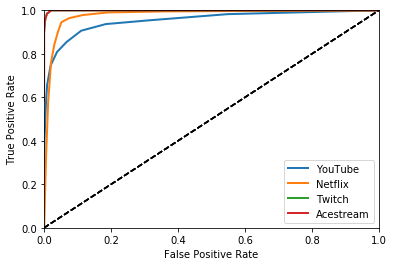

YouTube: 
	CrossValScore: 0.9044453186467349
	RocAucScore:  0.9538962131837307
Netflix: 
	CrossValScore: 0.9392800944138475
	RocAucScore:  0.9785232252410168
Twitch: 
	CrossValScore: 0.9903024914765277
	RocAucScore:  0.9995226639172108
Acestream: 
	CrossValScore: 0.9570798846052977
	RocAucScore:  0.9662669485347717
Multiclass: 
	CrossValScore: 0.9166053501180172
[[98 19  0  5]
 [ 7 83  0  1]
 [ 1  2 46  0]
 [ 9  2  0 36]]

Accuracy train set: 0.9975708502024292
Accuracy test set: 0.8511326860841424
-----OvO Classifier Random Forest------
[[98 21  0  3]
 [ 8 82  0  1]
 [ 1  1 47  0]
 [ 5  0  1 41]]

Accuracy train set: 0.9967611336032388
Accuracy test set: 0.8673139158576052
-----OvR Classifier Random Forest------
[[98 21  0  3]
 [ 6 85  0  0]
 [ 0  1 47  1]
 [ 7  0  1 39]]

Accuracy train set: 0.9959514170040485
Accuracy test set: 0.8705501618122977
----------SVM-----------


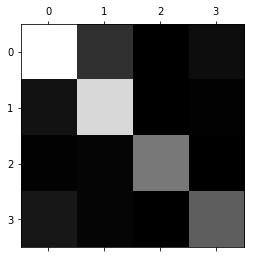

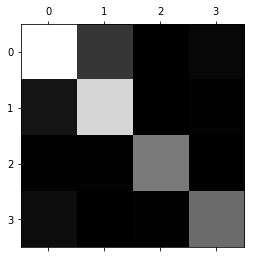

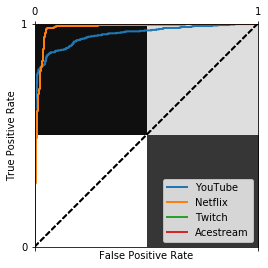

YouTube: 
	CrossValScore: 0.9085365853658536
	RocAucScore:  0.9511234221598879
Netflix: 
	CrossValScore: 0.9506359821662734
	RocAucScore:  0.978997955010225
Twitch: 
	CrossValScore: 0.9967609756097561
	RocAucScore:  0.9999832932371023
Acestream: 
	CrossValScore: 0.9530604248623131
	RocAucScore:  0.975749623365894
Multiclass: 
	CrossValScore: 0.9093339627589823
[[93 23  1  5]
 [ 6 85  0  0]
 [ 0  2 47  0]
 [ 6  0  1 40]]

Accuracy train set: 0.9255060728744939
Accuracy test set: 0.8576051779935275
----------Knn-----------


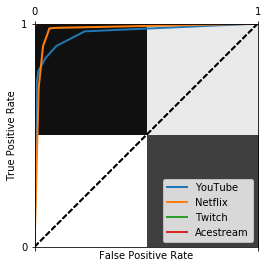

YouTube: 
	CrossValScore: 0.9117623918174667
	RocAucScore:  0.9577938288920056
Netflix: 
	CrossValScore: 0.9457710464201415
	RocAucScore:  0.9733976044405492
Twitch: 
	CrossValScore: 0.9967545239968529
	RocAucScore:  0.9994749303089319
Acestream: 
	CrossValScore: 0.9619513768686074
	RocAucScore:  0.9751482237449579
Multiclass: 
	CrossValScore: 0.9084818253343825
[[96 24  0  2]
 [ 7 84  0  0]
 [ 0  2 47  0]
 [ 2  0  1 44]]

Accuracy train set: 0.9408906882591093
Accuracy test set: 0.8770226537216829
-----Neural Network-----


/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


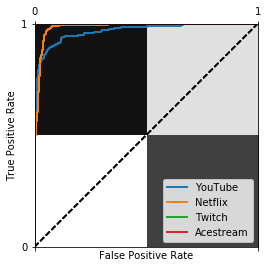

/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

YouTube: 
	CrossValScore: 0.919833464463677
	RocAucScore:  0.9657054698457223
Netflix: 
	CrossValScore: 0.9546747967479675
	RocAucScore:  0.9840140227870289
Twitch: 
	CrossValScore: 0.9992000000000001
	RocAucScore:  1.0
Acestream: 
	CrossValScore: 0.9668489902963545
	RocAucScore:  0.9817393206006706
Multiclass: 
	CrossValScore: 0.9198509310254392
[[99 19  0  4]
 [ 6 85  0  0]
 [ 1  1 47  0]
 [ 5  0  1 41]]

Accuracy train set: 0.951417004048583
Accuracy test set: 0.8802588996763754
--------AdaBoost Random Forest--------


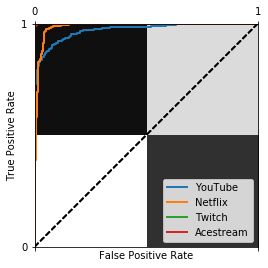

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(random_state=14)

do_test_forest(rf)

print("-----OvO Classifier Random Forest------")

rf = OneVsOneClassifier(rf)
do_test_forest_ovo(rf)

print("-----OvR Classifier Random Forest------")

rf = OneVsRestClassifier(rf)
do_test_forest_ovo(rf)

print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)


print("----------Knn-----------")
knn = KNeighborsClassifier()
do_test_knn(knn)

print("-----Neural Network-----")
nn = MLPClassifier()
do_test_knn(nn)


print("--------AdaBoost Random Forest--------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(
    rf,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

print("---------Decision Tree------")
dt = DecisionTreeClassifier(random_state=42)

do_test_forest(dt)

print("--------AdaBoost Decision Tree--------")

dt = DecisionTreeClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    dt,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

